In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

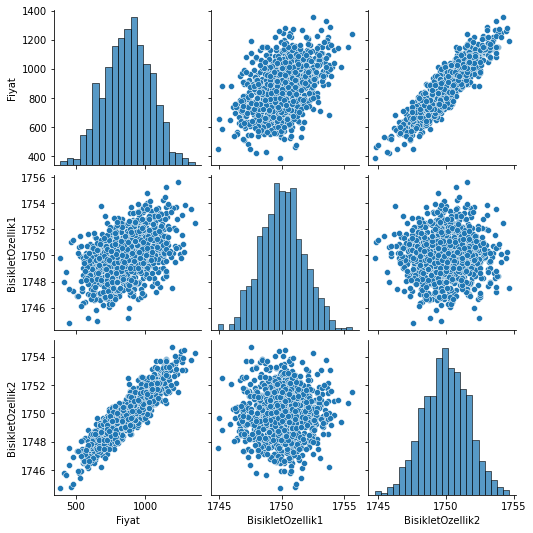

In [5]:
sbn.pairplot(df)

## split data test and train 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# y=fiyat and others is features

In [8]:
# y= wx +b
# y-> label
# x-> features
y = df["Fiyat"].values
x = df[["BisikletOzellik1","BisikletOzellik2"]].values
#.values for turn into np.array

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)
#test_size -> test percentage             random_state-> selection factor
# random state is not necessery, if used it always take same selection 

In [10]:
x_train.shape

(670, 2)

In [11]:
x_test.shape

(330, 2)

### scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train
#scaled into 0 and 1

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# imports for models and layers

In [19]:
model = Sequential()

model.add(Dense(5,activation="relu")) # how many nerons and activation
# repat this line to create more hidden layer
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1)) # for output

model.compile(optimizer="rmsprop", loss="mse") 

# after this steps model is ready to train

In [20]:
# batch -> split big data into little packege
# epochs -> how many timese run on all data set if runs too many times it occurs overfitting problem
# loss -> it should be getting decrease
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 994us/step - loss: 795821.4375
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795606.8125
Epoch 3/250
21/21 [==============================] - 0s 950us/step - loss: 795381.5625
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795115.1875
Epoch 5/250
21/21 [==============================] - 0s 950us/step - loss: 794804.7500
Epoch 6/250
21/21 [==============================] - 0s 997us/step - loss: 794447.6875
Epoch 7/250
21/21 [==============================] - 0s 760us/step - loss: 794042.0000
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 793584.4375
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 793074.3125
Epoch 10/250
21/21 [==============================] - 0s 997us/step - loss: 792515.4375
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 791906.6250
Epoch 12/250
21/21 [==============================]

21/21 [==============================] - 0s 664us/step - loss: 107122.7578
Epoch 95/250
21/21 [==============================] - 0s 760us/step - loss: 94729.8594
Epoch 96/250
21/21 [==============================] - 0s 760us/step - loss: 82844.8203
Epoch 97/250
21/21 [==============================] - 0s 712us/step - loss: 71616.4766
Epoch 98/250
21/21 [==============================] - 0s 712us/step - loss: 61106.5430
Epoch 99/250
21/21 [==============================] - 0s 712us/step - loss: 51267.3125
Epoch 100/250
21/21 [==============================] - 0s 712us/step - loss: 42308.8281
Epoch 101/250
21/21 [==============================] - 0s 690us/step - loss: 34176.9102
Epoch 102/250
21/21 [==============================] - 0s 760us/step - loss: 26951.9023
Epoch 103/250
21/21 [==============================] - 0s 855us/step - loss: 20749.7812
Epoch 104/250
21/21 [==============================] - 0s 713us/step - loss: 15627.3594
Epoch 105/250
21/21 [=============================

21/21 [==============================] - 0s 712us/step - loss: 833.4247
Epoch 189/250
21/21 [==============================] - 0s 712us/step - loss: 801.4434
Epoch 190/250
21/21 [==============================] - 0s 712us/step - loss: 767.0637
Epoch 191/250
21/21 [==============================] - 0s 761us/step - loss: 738.0767
Epoch 192/250
21/21 [==============================] - 0s 712us/step - loss: 707.1774
Epoch 193/250
21/21 [==============================] - 0s 712us/step - loss: 674.6981
Epoch 194/250
21/21 [==============================] - 0s 712us/step - loss: 650.2451
Epoch 195/250
21/21 [==============================] - 0s 665us/step - loss: 618.0218
Epoch 196/250
21/21 [==============================] - 0s 807us/step - loss: 588.2709
Epoch 197/250
21/21 [==============================] - 0s 665us/step - loss: 562.3729
Epoch 198/250
21/21 [==============================] - 0s 807us/step - loss: 537.2117
Epoch 199/250
21/21 [==============================] - 0s 712us/step

In [21]:
loss = model.history.history["loss"]

<AxesSubplot:>

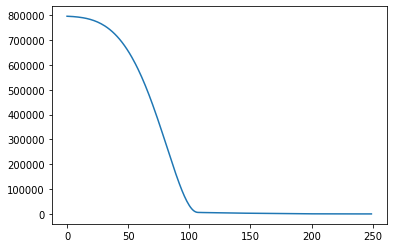

In [22]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [30]:
trainLoss =model.evaluate(x_train,y_train, verbose=0)

In [31]:
testLoss =model.evaluate(x_test,y_test, verbose=0)

In [34]:
# this two value should be close

In [32]:
trainLoss

74.25060272216797

In [33]:
testLoss

74.48133087158203

## Predict (Tahmin)

In [36]:
testPredicts = model.predict(x_test)

In [37]:
testPredicts  # predicted sale prices

array([[1077.7876 ],
       [ 625.20447],
       [ 876.6381 ],
       [ 895.3305 ],
       [ 900.6795 ],
       [ 454.48447],
       [ 931.7186 ],
       [ 991.92413],
       [ 941.16974],
       [1017.02423],
       [ 751.8575 ],
       [ 917.97205],
       [ 948.344  ],
       [1054.6704 ],
       [1120.8348 ],
       [ 683.0317 ],
       [1127.29   ],
       [ 652.9781 ],
       [1154.9097 ],
       [ 887.063  ],
       [ 893.4481 ],
       [ 717.54407],
       [ 458.36212],
       [ 614.1597 ],
       [ 835.54285],
       [1090.9279 ],
       [ 715.1425 ],
       [ 758.135  ],
       [ 874.46826],
       [ 771.7888 ],
       [ 453.63904],
       [ 783.78156],
       [ 729.51544],
       [ 648.5195 ],
       [ 887.4982 ],
       [ 844.67224],
       [1035.7665 ],
       [1023.38226],
       [ 845.54114],
       [ 863.13605],
       [ 758.13385],
       [1174.5938 ],
       [1097.5544 ],
       [1087.7092 ],
       [ 873.2957 ],
       [ 598.18036],
       [1146.1788 ],
       [ 973.

In [38]:
predictDF = pd.DataFrame(y_test,columns=["Real Y"])

In [39]:
predictDF # real sale prices

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [41]:
testPredicts = pd.Series(testPredicts.reshape(330,))

In [42]:
testPredicts

0      1077.787598
1       625.204468
2       876.638123
3       895.330505
4       900.679504
          ...     
325    1013.639343
326     792.122192
327     766.773193
328    1167.124268
329     804.216919
Length: 330, dtype: float32

In [43]:
predictDF = pd.concat([predictDF,testPredicts],axis=1)

In [45]:
predictDF.columns=["Real Y","Predicted Y"]

In [46]:
predictDF

,Real Y,Predicted Y
0,1081.652164,1077.787598
1,622.675990,625.204468
2,889.356810,876.638123
3,902.826733,895.330505
4,897.662404,900.679504
...,...,...
325,1028.438035,1013.639343
326,789.934950,792.122192
327,758.490486,766.773193
328,1172.871659,1167.124268


<AxesSubplot:xlabel='Real Y', ylabel='Predicted Y'>

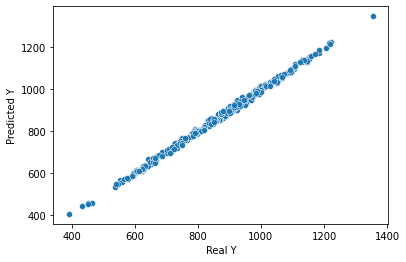

In [47]:
sbn.scatterplot(x="Real Y", y ="Predicted Y",data=predictDF)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
# absolute 
mean_absolute_error(predictDF["Real Y"], predictDF["Predicted Y"])

6.902635047398199

In [50]:
mean_squared_error(predictDF["Real Y"], predictDF["Predicted Y"])

74.4813423795079

In [53]:
df.describe()
# sapma 6.90 ortalaması 872 lira olan üründe 7 lira kadar sapma kabul edilebilir

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


## Trying a new bcycle 

In [58]:
newBicycleFeatures = [[1753,1751]]

In [59]:
newBicycleFeatures=scaler.transform(newBicycleFeatures)

In [61]:
model.predict(newBicycleFeatures)
#my dataset has random values so predict is looks wrong

array([[1082.672]], dtype=float32)

## Save a model

In [62]:
from tensorflow.keras.models import load_model

In [64]:
model.save("bicycle=model.h5")

## Load model

In [65]:
calledModel = load_model("bicycle=model.h5")

In [66]:
calledModel.predict(newBicycleFeatures)

array([[1082.672]], dtype=float32)